In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('archive/train.csv')

### Data Overview

In [3]:
df.sample(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
2398,24922,170000,1,1,1,35,-2,-2,-2,-2,...,-21,-21,-21,0,0,0,0,0,0,0
11248,19498,180000,2,5,2,34,1,-1,-1,-2,...,0,0,0,149,0,0,0,0,0,0
3293,4497,10000,1,2,2,24,2,0,0,0,...,7546,9260,10000,3000,2000,3000,2000,1000,0,0
10121,18829,280000,2,1,2,29,0,0,0,0,...,158775,162035,165522,5500,5700,5800,5900,6100,6100,0
8672,27406,100000,1,5,3,44,2,2,0,0,...,30456,29420,27102,0,2005,1700,976,2000,3000,0
14889,28753,180000,2,2,3,41,0,0,0,0,...,77752,66202,58557,5481,4399,3008,2150,2147,2120,0
13288,12158,130000,1,1,2,33,1,2,2,2,...,39526,41346,40630,0,6000,0,3000,1000,1100,0
7379,9348,50000,2,1,2,24,-2,-2,-2,-2,...,1200,666,1480,220,677,1200,666,1480,3710,0
12141,6966,50000,2,3,2,23,0,0,0,0,...,29894,30125,30192,1500,1467,1201,1236,1103,1042,0
10791,14116,50000,2,2,1,39,-1,-1,-1,-1,...,390,390,390,390,390,390,390,390,390,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

### Statistical Summary

In [5]:
nums = [
    'LIMIT_BAL', 'AGE', 
    'BILL_AMT1', 'BILL_AMT2', 
    'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 
    'PAY_AMT1', 'PAY_AMT2',
    'PAY_AMT3', 'PAY_AMT4',
    'PAY_AMT5', 'PAY_AMT6'
]
cats = [
    'SEX', 'EDUCATION',
    'MARRIAGE', 'PAY_0',
    'PAY_2', 'PAY_3',
    'PAY_4', 'PAY_5',
    'PAY_6'
]

In [6]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
BILL_AMT1,21000.0,51501.542381,73453.641859,-14386.0,3564.75,22578.0,67876.25,746814.0
BILL_AMT2,21000.0,49463.502667,70866.586004,-69777.0,3000.00,21550.0,64918.25,743970.0
BILL_AMT3,21000.0,47232.577762,69539.883466,-157264.0,2686.25,20242.0,60826.75,1664089.0
BILL_AMT4,21000.0,43387.372476,64081.073110,-170000.0,2332.00,19158.5,55376.75,706864.0
BILL_AMT5,21000.0,40398.551095,60396.811177,-81334.0,1759.00,18266.5,50517.25,587067.0
BILL_AMT6,21000.0,38931.194000,59196.499234,-209051.0,1242.75,17203.5,49463.00,699944.0
PAY_AMT1,21000.0,5686.349333,16868.075695,0.0,998.25,2100.0,5023.25,873552.0
PAY_AMT2,21000.0,5923.003476,23909.526477,0.0,836.00,2011.0,5000.00,1684259.0


In [9]:
for i in range(0, len(cats)):
    df[cats[i]] = df[cats[i]].astype(str)

In [10]:
df[cats].describe().transpose()

,count,unique,top,freq
SEX,21000,2,2,12759
EDUCATION,21000,7,2,9789
MARRIAGE,21000,4,2,11184
PAY_0,21000,11,0,10324
PAY_2,21000,11,0,11043
PAY_3,21000,11,0,11056
PAY_4,21000,10,0,11542
PAY_5,21000,10,0,11852
PAY_6,21000,10,0,11450


In [16]:
for i in cats:
    print(f'Value Count Kolom {i}:')
    print(df[i].value_counts())
    print('='*30)

Value Count Kolom SEX:
2    12759
1     8241
Name: SEX, dtype: int64
Value Count Kolom EDUCATION:
2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64
Value Count Kolom MARRIAGE:
2    11184
1     9561
3      219
0       36
Name: MARRIAGE, dtype: int64
Value Count Kolom PAY_0:
0     10324
-1     3937
1      2608
-2     1923
2      1883
3       231
4        47
5        19
8        11
6         9
7         8
Name: PAY_0, dtype: int64
Value Count Kolom PAY_2:
0     11043
-1     4174
2      2776
-2     2643
3       229
4        69
1        23
5        21
7        11
6        10
8         1
Name: PAY_2, dtype: int64
Value Count Kolom PAY_3:
0     11056
-1     4125
-2     2868
2      2670
3       173
4        55
7        22
5        14
6        13
8         2
1         2
Name: PAY_3, dtype: int64
Value Count Kolom PAY_4:
0     11542
-1     3949
-2     3047
2      2208
3       135
4        51
7        43
5        19
6         4
8         2
Name: P

### Exploratory Data Analysis (EDA)

#### Violin Plot

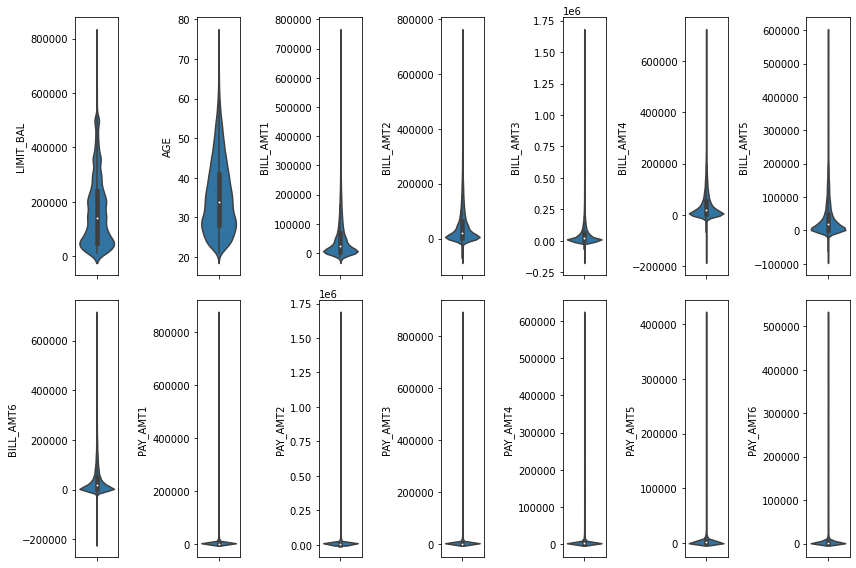

In [22]:
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

#### Dist Plot

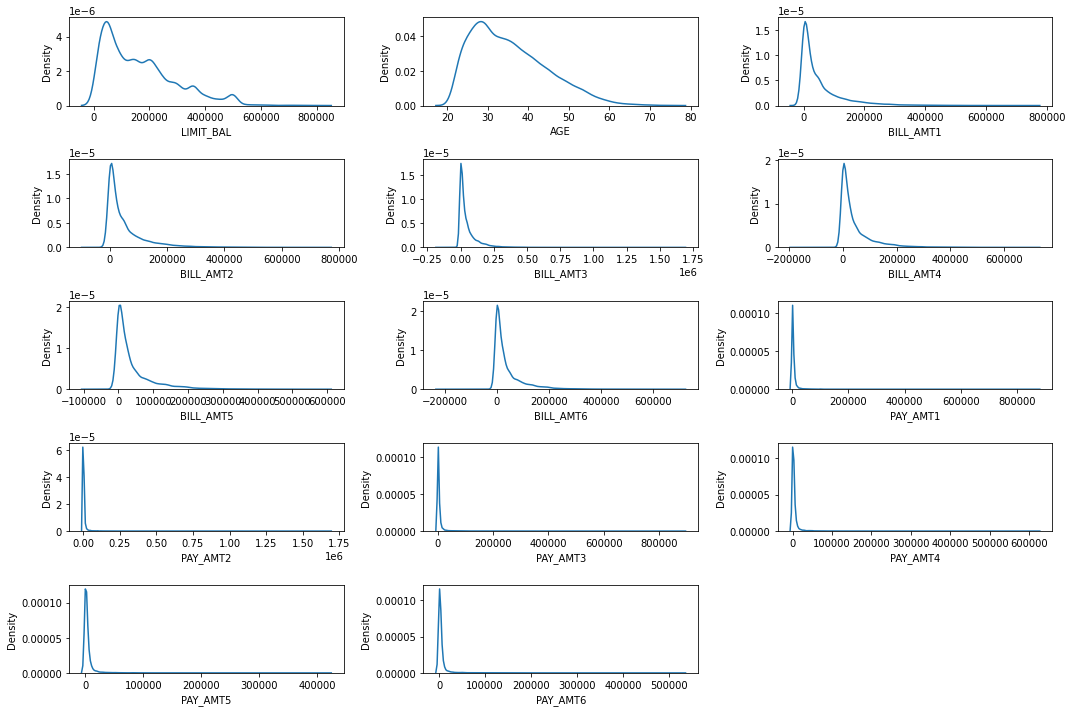

In [25]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

#### Count Plots

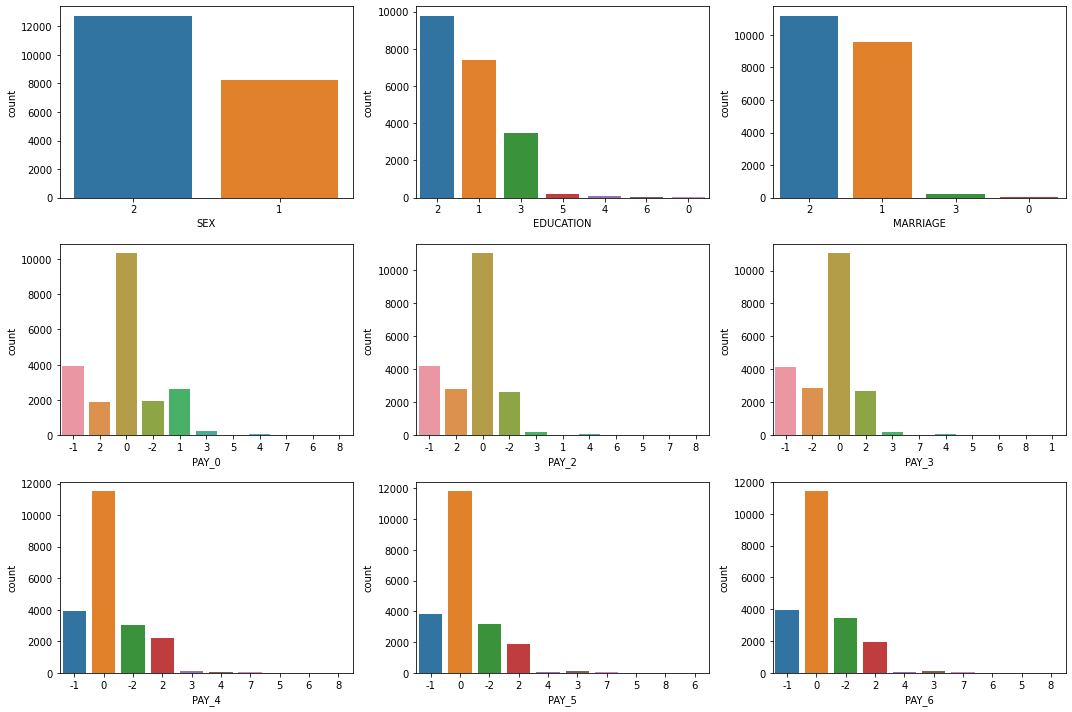

In [26]:
plt.figure(figsize=(15, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], orient='v')
    plt.tight_layout()

#### Heatmap Correlation

In [35]:
df_corr = df.drop(['ID'], axis=1).corr()
df_corr

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
LIMIT_BAL,1.000000,0.143206,0.290539,0.283654,0.288947,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
AGE,0.143206,1.000000,0.054186,0.053819,0.053439,0.049968,0.048377,0.047465,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664
BILL_AMT1,0.290539,0.054186,1.000000,0.951243,0.889651,0.856470,0.826714,0.798465,0.138656,0.097091,0.131645,0.153106,0.166235,0.184700,-0.028493
BILL_AMT2,0.283654,0.053819,0.951243,1.000000,0.926553,0.892248,0.860917,0.829886,0.277851,0.106219,0.131176,0.147061,0.160733,0.179634,-0.022796
BILL_AMT3,0.288947,0.053439,0.889651,0.926553,1.000000,0.924068,0.884616,0.851770,0.239077,0.315926,0.123667,0.140971,0.189345,0.184794,-0.022824
BILL_AMT4,0.297446,0.049968,0.856470,0.892248,0.924068,1.000000,0.940091,0.899136,0.238057,0.206505,0.282794,0.123313,0.170126,0.185184,-0.020185
BILL_AMT5,0.297377,0.048377,0.826714,0.860917,0.884616,0.940091,1.000000,0.943850,0.224684,0.178411,0.228640,0.285776,0.146920,0.173734,-0.015790
BILL_AMT6,0.291518,0.047465,0.798465,0.829886,0.851770,0.899136,0.943850,1.000000,0.208428,0.171109,0.210850,0.243471,0.317413,0.123303,-0.015480
PAY_AMT1,0.194995,0.025439,0.138656,0.277851,0.239077,0.238057,0.224684,0.208428,1.000000,0.324954,0.306546,0.233288,0.159679,0.181988,-0.076042
PAY_AMT2,0.176589,0.022501,0.097091,0.106219,0.315926,0.206505,0.178411,0.171109,0.324954,1.000000,0.292610,0.202391,0.191733,0.138168,-0.059409


<AxesSubplot:>

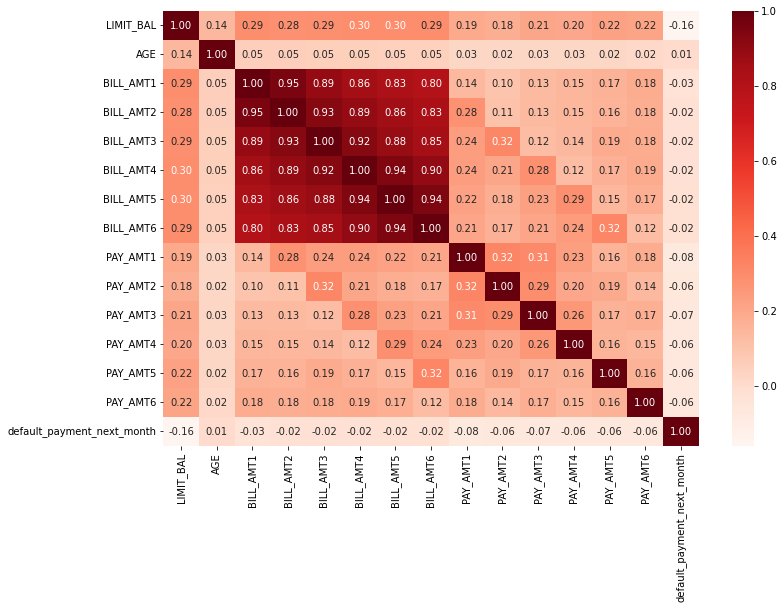

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, cmap='Reds', annot=True, fmt='.2f')

#### Pair Plots

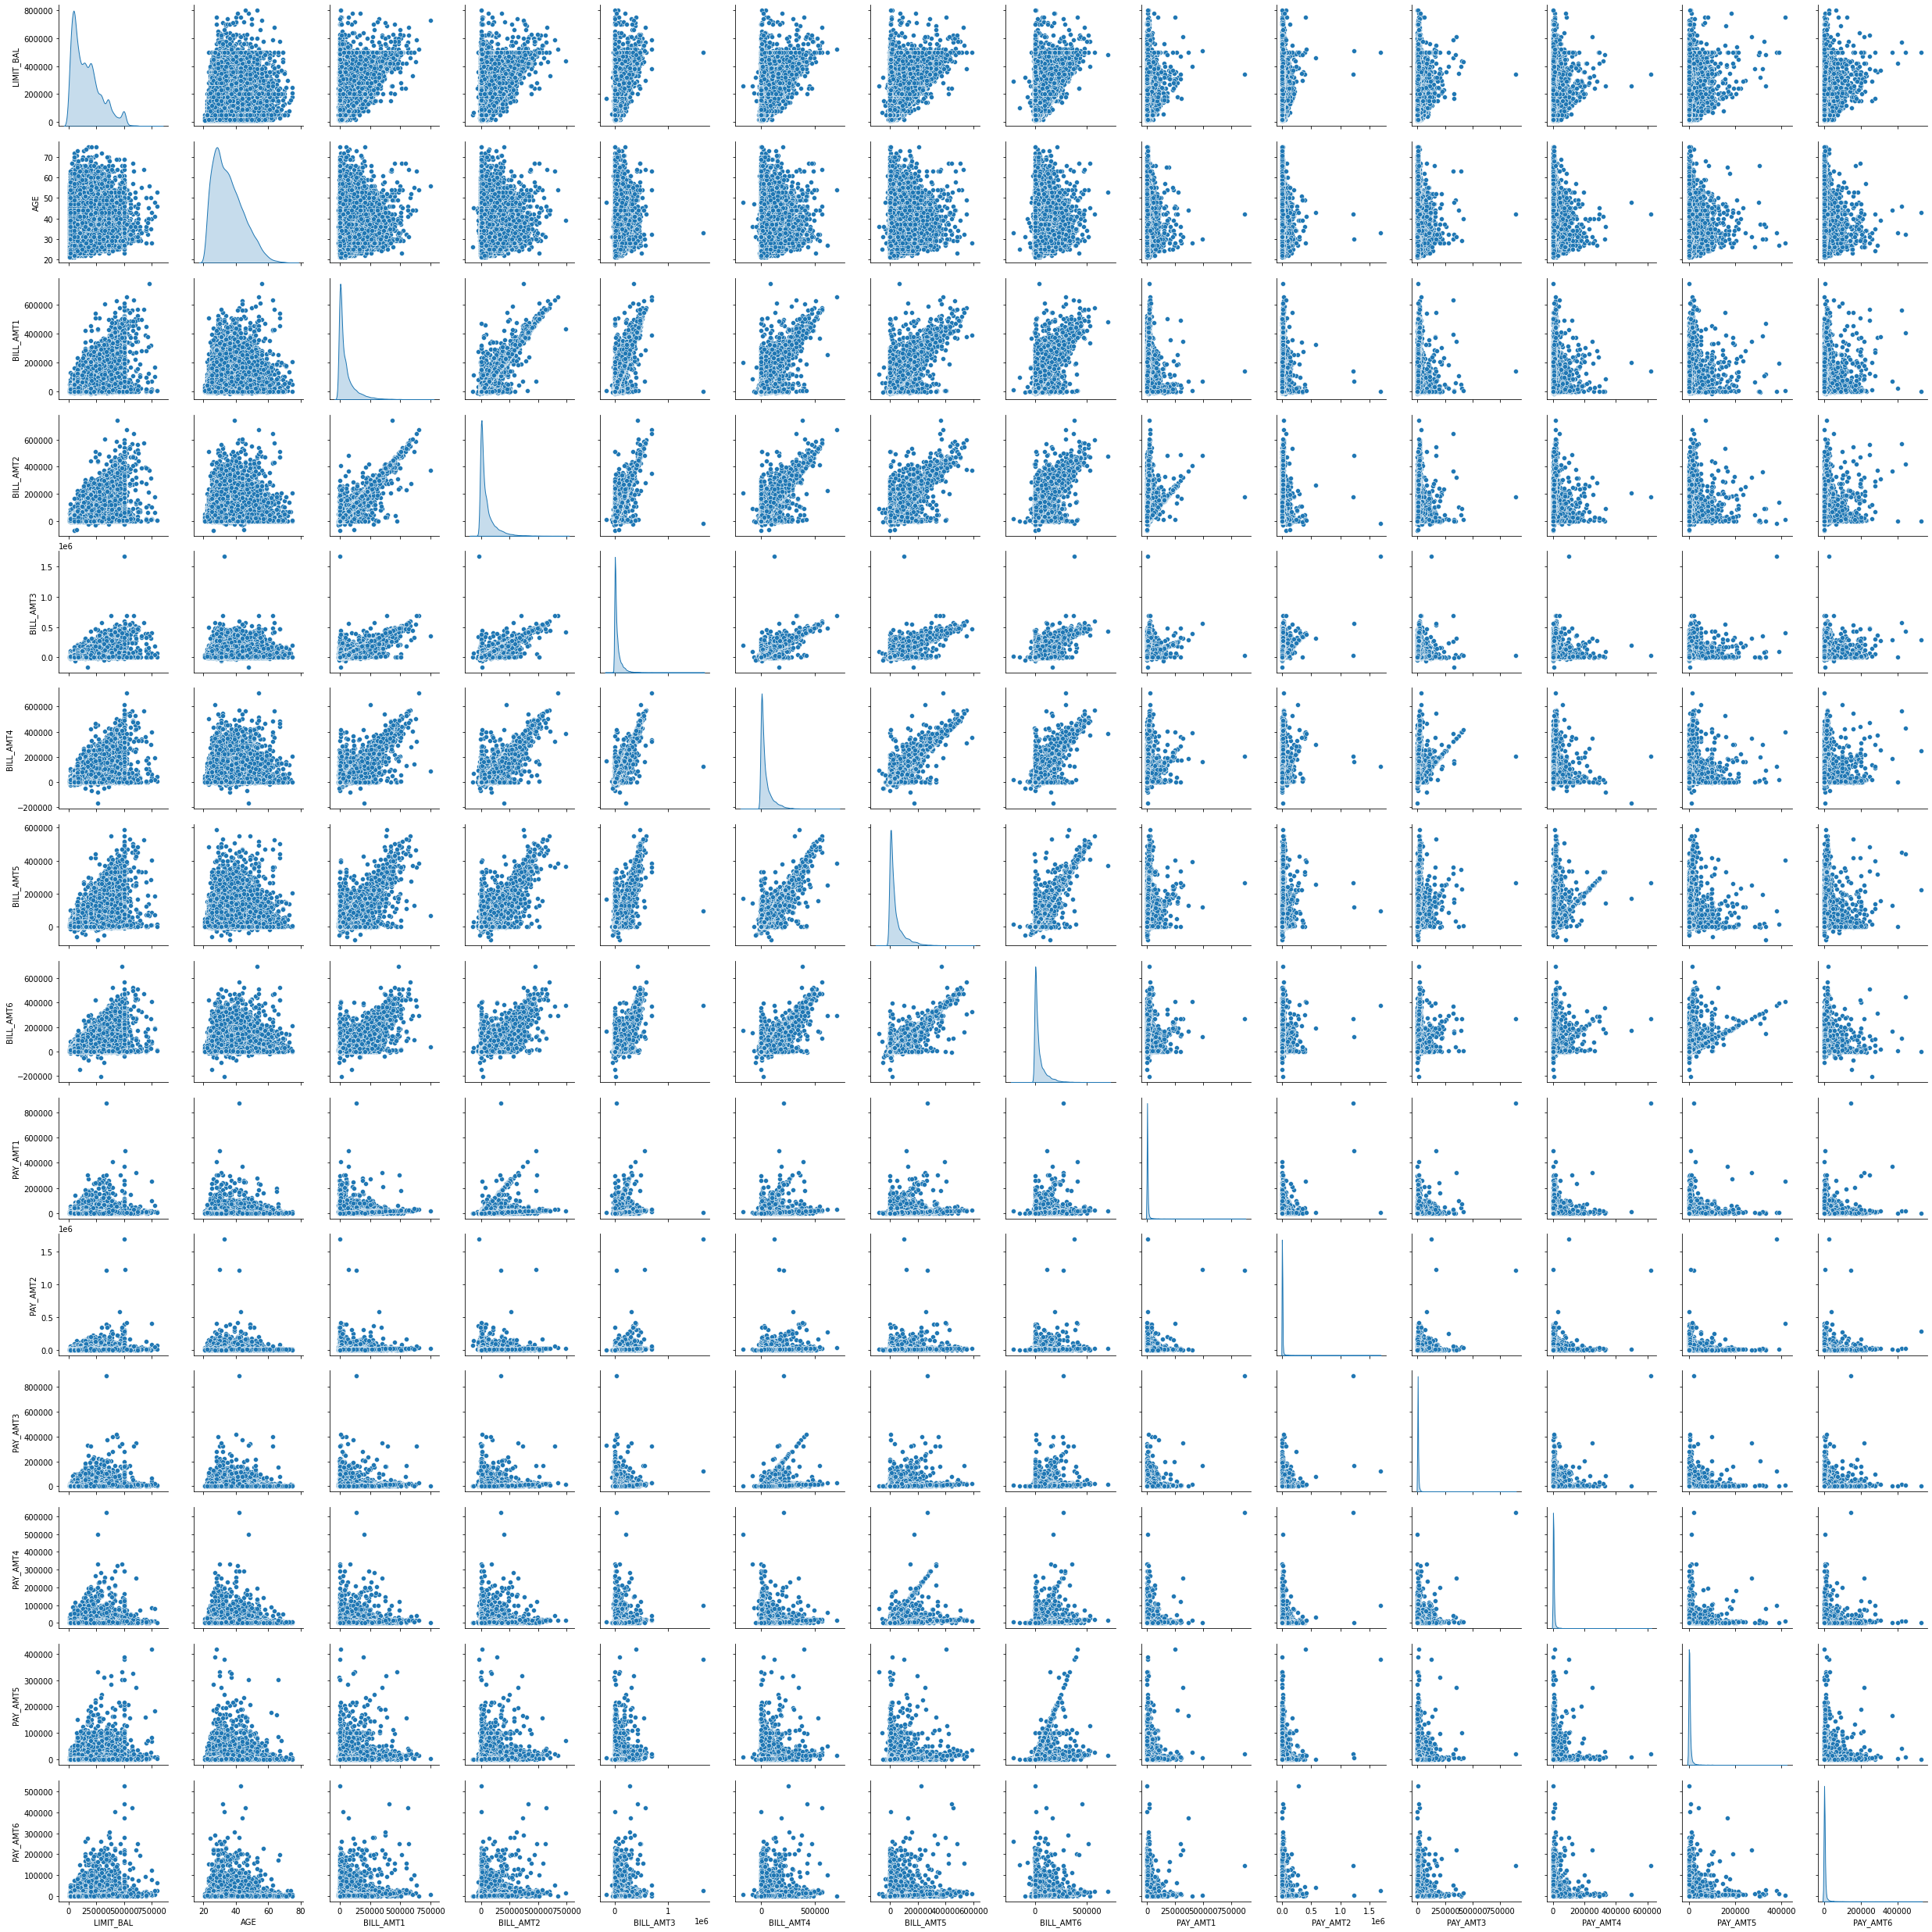

In [30]:
df_sample = df.sample(1000, random_state=42)
sns.pairplot(df[nums], diag_kind='kde')

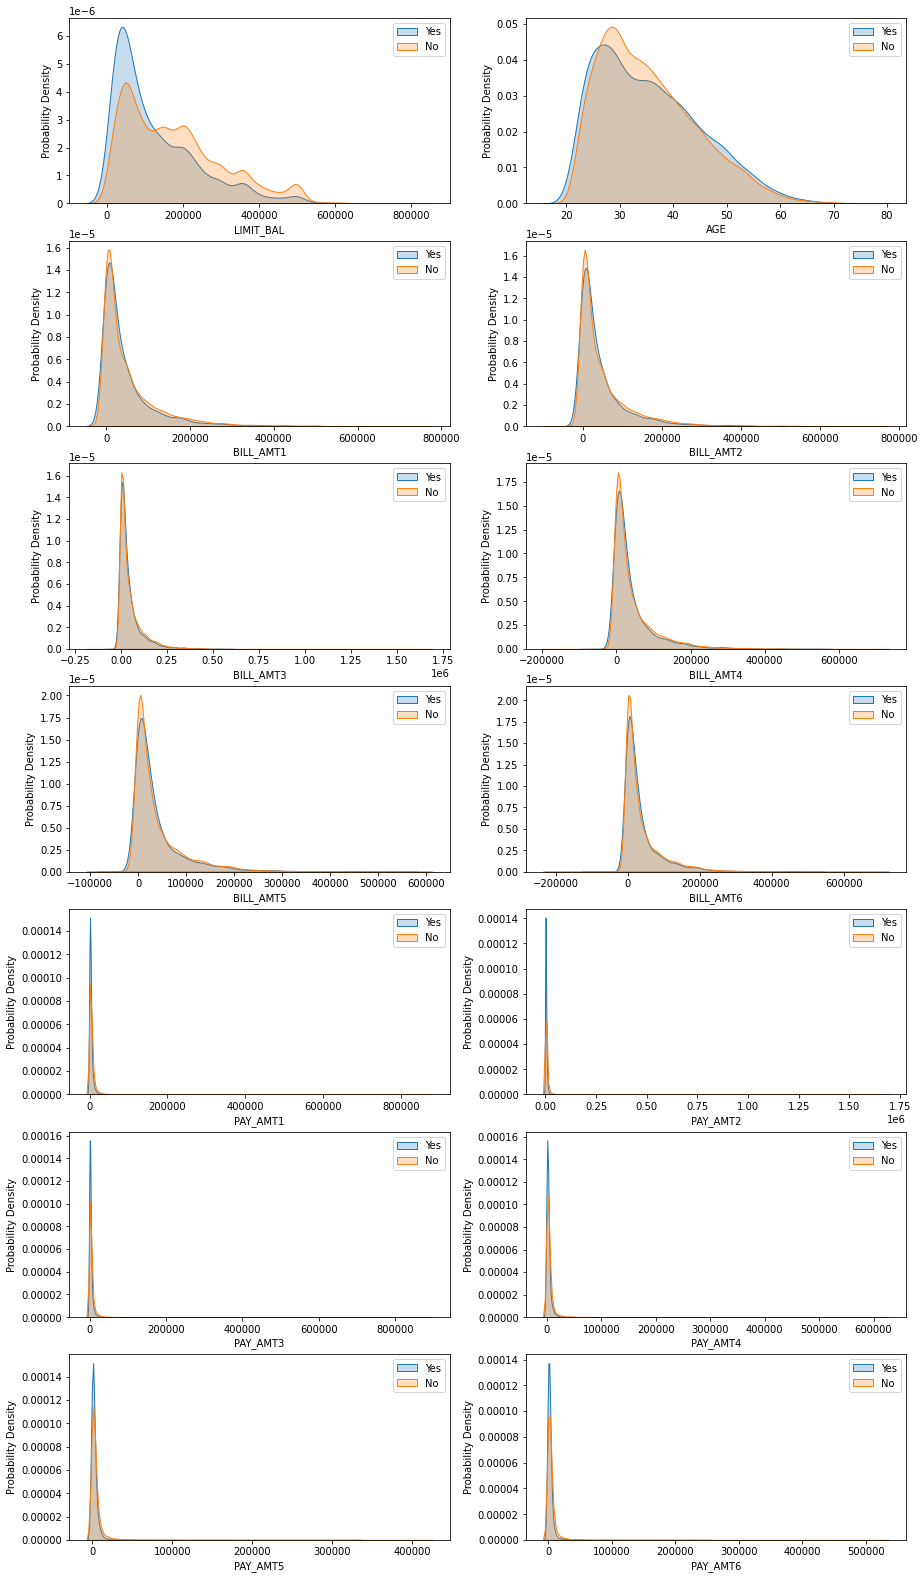

In [47]:
plt.figure(figsize=(15, 28))
for i in range(0, len(nums)):
    plt.subplot(7, len(nums)/5, i+1)
    sns.kdeplot(df.loc[(df['default_payment_next_month'] == 1), nums[i]], shade=True)
    sns.kdeplot(df.loc[(df['default_payment_next_month'] == 0), nums[i]], shade=True)
    plt.xlabel(nums[i])
    plt.ylabel('Probability Density')
    plt.legend(["Yes", "No"])